In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [ ]:
data = pd.read_csv('//content/parkinsons_disease_data.csv')

In [ ]:
print(data.head())

   Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0   85       0          3               1  19.619878        0   
1   75       0          0               2  16.247339        1   
2   70       1          0               0  15.368239        0   
3   52       0          0               0  15.454557        0   
4   87       0          0               1  18.616042        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0                 522               267          847          1842  ...   
1                 622              1758         1811           571  ...   
2                 211                35         1396          2078  ...   
3                 618               265         1444            78  ...   
4                1014               226         1016          1862  ...   

   FunctionalAssessment  Tremor  Rigidity  Bradykinesia  PosturalInstability  \
0              1.572427       1         0             0                    0  

In [ ]:
data = data.drop('PatientID', axis=1)

In [ ]:
categorical_columns = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'AlcoholConsumption',
                       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons',
                       'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke',
                       'SpeechProblems', 'SleepDisorders', 'Constipation', 'DoctorInCharge']

In [ ]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [ ]:
X = data.drop('Diagnosis', axis=1)  # Características
y = data['Diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dtc_model.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[204  33]
 [ 57 338]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       237
           1       0.91      0.86      0.88       395

    accuracy                           0.86       632
   macro avg       0.85      0.86      0.85       632
weighted avg       0.86      0.86      0.86       632



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

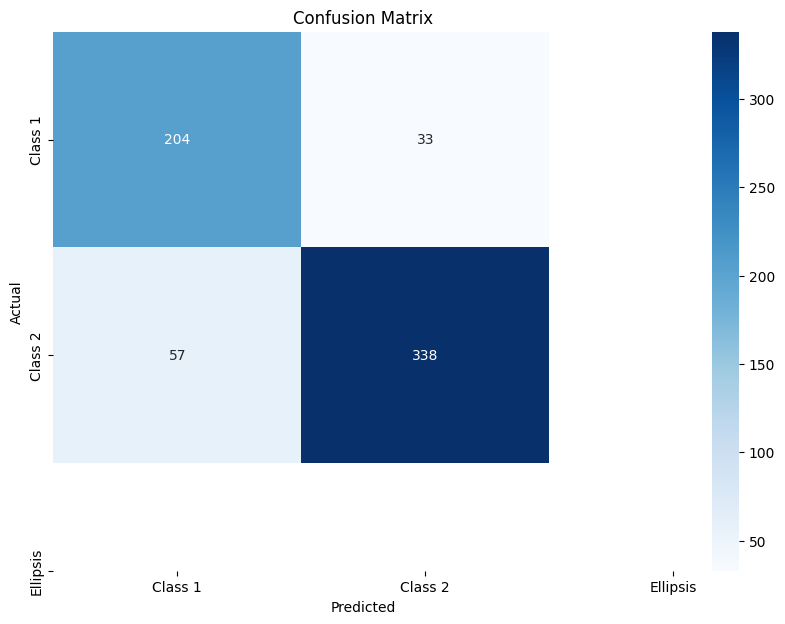

In [ ]:
classes = ['Class 1', 'Class 2', ...]

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
label_encoders = {'Diagnosis': label_encoder}

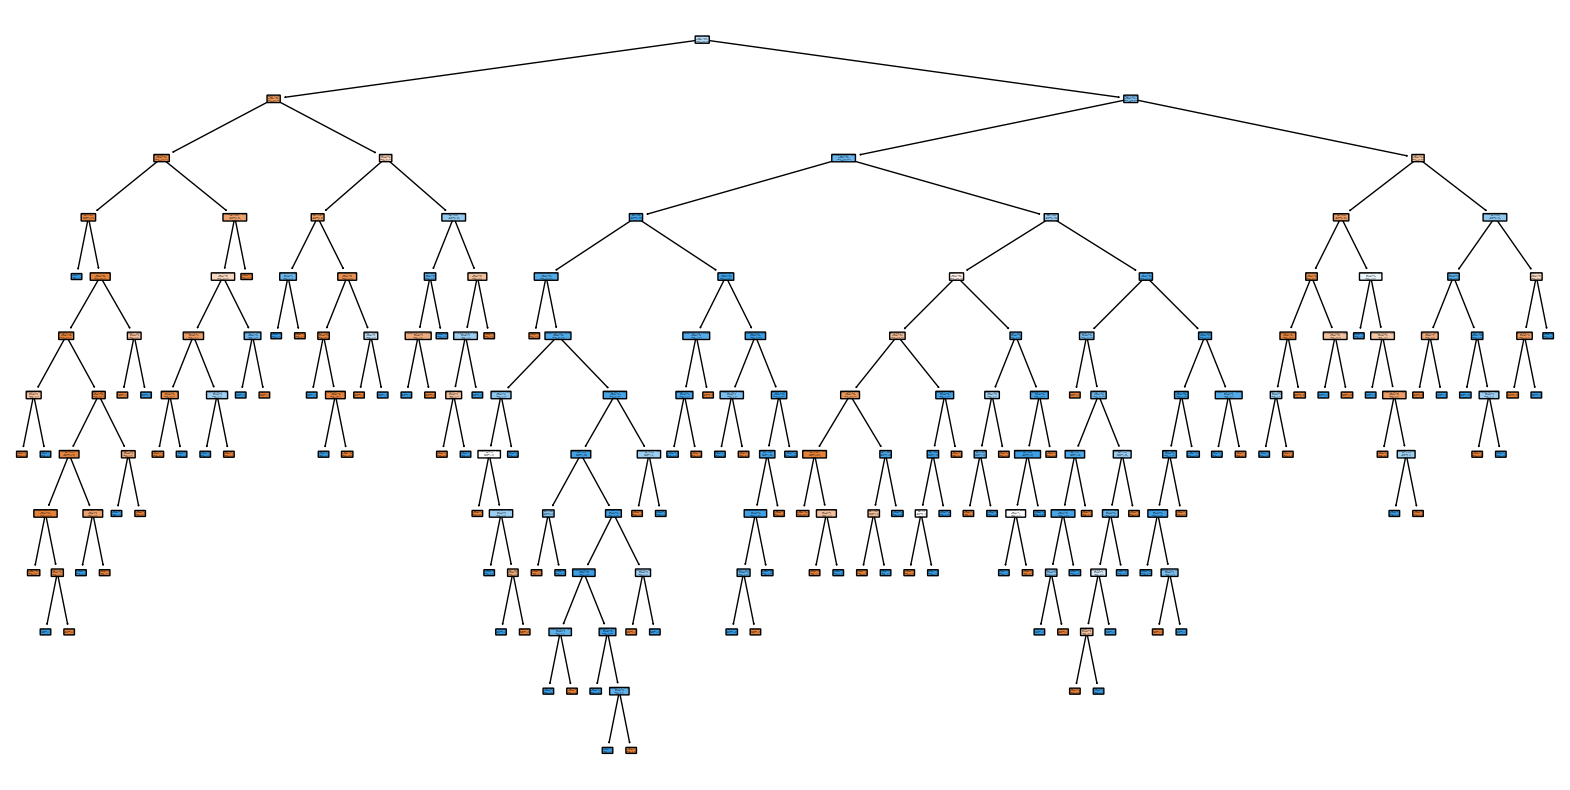

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dtc_model, feature_names=X.columns, class_names=[str(c) for c in label_encoders['Diagnosis'].classes_], filled=True, rounded=True)
plt.show()